# Linear regression with one and multiple variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1. Use the head and describe function to examine the data and display few columns.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2. Plot and analyze the data, where: x - population, y - profit.

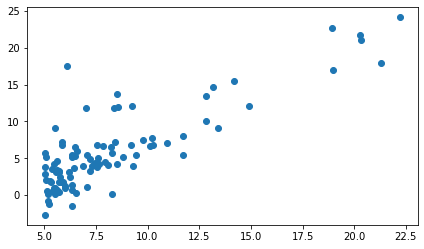

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.scatter(data['Population'], data['Profit'])

Ex. 3. In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [6]:
data.insert(0, "Ones", np.ones(len(data), dtype=int), True)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


Ex 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 3). Check with the head function if your implementation is correct:

In [7]:
X = data[['Ones', 'Population']]
y = data[['Profit']]

In [8]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.,0.]))

Ex. 6 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on $X$, $y$ and parameter $\theta$.

In [10]:
def computeCost(X, Y, theta):
    J = sum(np.square(x * theta.transpose() - y) for x, y in zip (X, Y))/(2*len(Y))
    return J[0,0]

Ex. 7 Test the cost function with ($\theta=0$).
Output: 32.07 (may differ…)

In [11]:
computeCost(X, y, theta)


KeyboardInterrupt: 

Ex. 8 Please implement the gradient descent algorithm:
    the function returns optimized values $\theta$
and a vector of the cost function value for each iteration


In [12]:
def gradient_prosty(X, Y, theta, alpha, it):
    cost = list()
    cost.append(computeCost(X, Y, theta))
    for _ in range(it):
        for i in range(theta.shape[0] + 1):
            theta[0, i] -= alpha * sum((x * theta.transpose() - y) * x[0, i] for x, y in zip (X, Y))/(len(Y))
        cost.append(computeCost(X, Y, theta))
    return theta, cost

In [13]:
alpha = 0.01
it = 1000

Ex. 9 Please calculate the optimal parameters for the dataset.

In [14]:
it = 3000
theta_opt, cost = gradient_prosty(X, y, theta, alpha, it)

KeyboardInterrupt: 

In [ ]:
theta_opt

In [ ]:
cost[-5:]

Ex. 10 Please calculate the cost function for the given (zad.8) θ.

In [ ]:
computeCost(X, y, theta_opt)

Ex. 11 Plot the regression function and our dataset.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.scatter(data['Population'], data['Profit'])
ax.plot(X, theta_opt[0,1]*X+theta_opt[0,0])
ax.set_xlim(4,23)

Ex. 12 Plot the relationship between the cost function and number of iterations.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

plt.plot(range(0, len(cost)), cost, 'r-')
plt.xlabel("Iterations")
plt.ylabel("Cost")

## Linear regression with multiple variables

In [ ]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

Ex. 1. Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [ ]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

Ex.2 Please perform steps 3-11 from the previous task by using the same functions.

In [ ]:
data2.insert(0, "Ones", np.ones(len(data2), dtype=int), True)
data2.head()

In [ ]:
X = data2[['Ones', 'Size', 'Bedrooms']]
y = data2[['Price']]

In [ ]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.,0.,0.]))

In [ ]:
computeCost(X, y, theta)

In [ ]:
theta_opt, cost = gradient_prosty(X, y, theta, alpha, it)

In [ ]:
theta_opt

In [ ]:
cost[-5:]

In [ ]:
computeCost(X, y, theta_opt)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(data2['Size'].min(), data2['Size'].max())
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max())

ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'])
ax.plot(x, y, theta_opt[0,2]*y+theta_opt[0,1]*x+theta_opt[0,0])

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

plt.plot(range(len(cost)), cost, 'r-')
plt.xlabel("Iterations")
plt.ylabel("Cost")

## Linear regression - Python

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import sklearn

# Import danych
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target


Ex. 1. Divide the database into training and testing.

In [ ]:
# Normalizacja/Standaryzacja
boston_X = (boston_X - boston_X.mean())/boston_X.std()
boston_Y = (boston_Y - boston_Y.mean())/boston_Y.std()
# Podział na zbiór treningowy i testowy (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size=0.30, random_state=42)

Ex. 2. According to the above example, please implement linear regression model for the dataset. Please calculate the statistical metrics for the model including MSE and R2?

In [ ]:
# Stworzenie obiektu
regr = linear_model.LinearRegression()

# Uczenie modelu przy pomocy bazy treningowej
regr.fit(X_train, Y_train)
# Przewidywanie wartości dla danych testowych
Y_predicted = regr.predict(X_test)

# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)

#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))
R2 = sklearn.metrics.r2_score(Y_test, Y_predicted)
print("R2 score: {}".format(R2))

Ex. 3. Plot the linear regression for each attribute in the Boston dataset.

In [ ]:
for i in range(12):
    x = np.linspace(boston_X[:, i].min(), boston_X[:, i].max())
    y = regr.coef_[0] + regr.coef_[i+1]*x

    plt.scatter(boston_X[:, i], boston_Y, label="Data")
    plt.plot(x, y, label="Function fitted by gradient descent")
    plt.legend()
    plt.show()

Additionally Compare the linear regression models (Linear Regression, Lasso, Ridge, ElasticNet) based on the mean error rate.

In [ ]:
reg_LinReg =linear_model.LinearRegression()
reg_Ridge = linear_model.Ridge(alpha = .5)
reg_Lasso = linear_model.Lasso(alpha = 5.1)
reg_ElNet =linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)

In [ ]:
# Uczenie modelu przy pomocy bazy treningowej
reg_LinReg.fit(X_train, Y_train)
reg_Ridge.fit(X_train, Y_train)
reg_Lasso.fit(X_train, Y_train)
reg_ElNet.fit(X_train, Y_train)
# Przewidywanie wartości dla danych testowych
Y_predicted_LinReg = reg_LinReg.predict(X_test)
Y_predicted_Ridge = reg_Ridge.predict(X_test)
Y_predicted_Lasso = reg_Lasso.predict(X_test)
Y_predicted_ElNet = reg_ElNet.predict(X_test)
# Wyświetlenie parametrów prostej
print('LinearRegression coefficients: \n', reg_LinReg.coef_)
print('Ridge coefficients: \n', reg_Ridge.coef_)
print('Lasso coefficients: \n', reg_Lasso.coef_)
print('ElasticNet coefficients: \n', reg_ElNet.coef_)
#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
MSE_LinReg = sklearn.metrics.mean_squared_error(Y_test, Y_predicted_LinReg)
print("LinearRegression residual sum of squares: {}".format(MSE_LinReg))
R2_LinReg = sklearn.metrics.r2_score(Y_test, Y_predicted_LinReg)
print("LinearRegression R2 score: {}".format(R2_LinReg))

MSE_Ridge = sklearn.metrics.mean_squared_error(Y_test, Y_predicted_Ridge)
print("Ridge residual sum of squares: {}".format(MSE_Ridge))
R2_Ridge = sklearn.metrics.r2_score(Y_test, Y_predicted_Ridge)
print("Ridge R2 score: {}".format(R2_Ridge))

MSE_Lasso = sklearn.metrics.mean_squared_error(Y_test, Y_predicted_Lasso)
print("Lasso residual sum of squares: {}".format(MSE_Lasso))
R2_Lasso = sklearn.metrics.r2_score(Y_test, Y_predicted_Lasso)
print("Lasso R2 score: {}".format(R2_Lasso))

MSE_ElNet = sklearn.metrics.mean_squared_error(Y_test, Y_predicted_ElNet)
print("ElasticNet residual sum of squares: {}".format(MSE_ElNet))
R2_ElNet = sklearn.metrics.r2_score(Y_test, Y_predicted_ElNet)
print("ElasticNet R2 score: {}".format(R2_ElNet))
